<h2 style="text-align: center">PHILIPPINES DENGUE CASES DATA ANALYTICS PROJECT</h2>
<hr>
<h4 style="text-align: center">ANALYST : JUNNALYN M. MERILLO</h4>

<h2>IMPORT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

<h2>UPLOAD AND CHECK DATASET</h2>

In [2]:
PH_Dengue = pd.read_csv('Datasets\\dengue.csv')
PH_Dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h2>CHECKING AVAILABLE COLUMNS</h2>

In [3]:
PH_Dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h2>CHANGING DATA TYPE</h2>

In [4]:
PH_Dengue['Month'] = PH_Dengue['Month'].astype('category')
PH_Dengue['Region'] = PH_Dengue['Region'].astype('category')

In [5]:
PH_Dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h2>CHECKING NULL VALUES</h2>

In [6]:
PH_Dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2 style="text-align: center">EXPLANATORY DATA ANALYSIS</h2>
<hr>

<h2>Question 1. How many deaths cause by dengue are recorded from Region V and IV-A?</h2>

In [7]:
RV = PH_Dengue[PH_Dengue['Region'] == 'Region V'] ['Dengue_Deaths']
RV.sum()

np.int64(185)

In [8]:
R_IVA = PH_Dengue[PH_Dengue['Region'] == 'Region IV-A'] ['Dengue_Deaths']
R_IVA.sum()

np.int64(652)

<h4>Insight 1</h4>
<p>Based on the results above, the recorded total number of deaths caused by dengue in Region V is 185, while Region IV-A has a total of 652 recorded deaths. This indicates that Region IV-A has a significantly higher number of dengue-related fatalities. It shows that Region IV-A may need more help to fight the spread of dengue.</p>
<hr>

<h2>Question 2. Which year had the highest number of dengue cases?</h2>

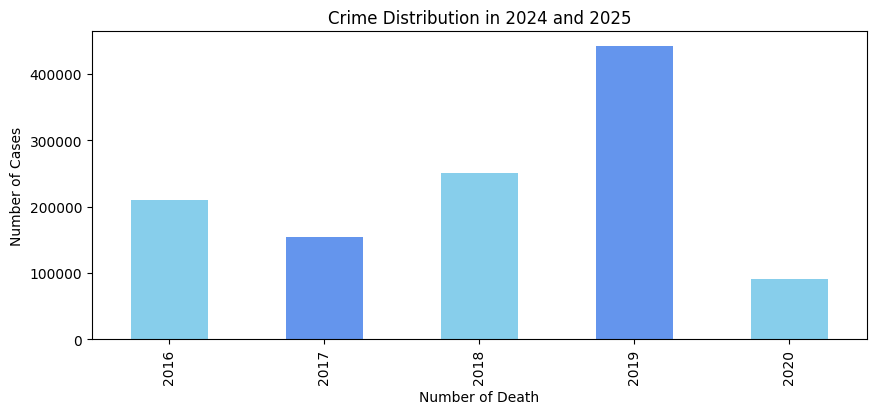

In [9]:
PH_YDeath = PH_Dengue.groupby(['Year'])['Dengue_Cases'].sum()
PH_YDeath.plot(kind='bar', stacked=True, color = ['skyblue', 'cornflowerblue'])

plt.title('Crime Distribution in 2024 and 2025')
plt.xlabel('Number of Death')
plt.ylabel('Number of Cases')
plt.gcf().set_size_inches(10,4)
plt.show()

<h4>Insight 2</h4>
<p>The visualization above shows that, 2019 had the most dengue cases compared to other years. It was followed by 2018 and 2016. This means dengue spread more widely in 2019, so health actions during that year were very important. </p>
<hr>

<h2>Question 3. What are the dengue case numbers in selected regions and years from the dataset?</h2>

In [10]:
PH_Dengue.loc[[500,600,700,800,900],['Year', 'Region', 'Dengue_Cases']]

,Year,Region,Dengue_Cases
500,2017,Region VIII,198
600,2016,Region X,1450
700,2019,Region XI,257
800,2017,Region XIII,184
900,2016,CAR,579


<h4>Insight 3</h4>
<p>The table above shows the dengue cases from different regions and years. Region X in 2016 had the highest number with 1,450 cases, while CAR in the same year had 579. This tells us that dengue affects regions differently, even in the same year. While Region VIII and Region XIII in 2017 had the lowest number of cases. </p>
<hr>

<h2>Question 4. Which region had the highest number of dengue deaths? </h2>

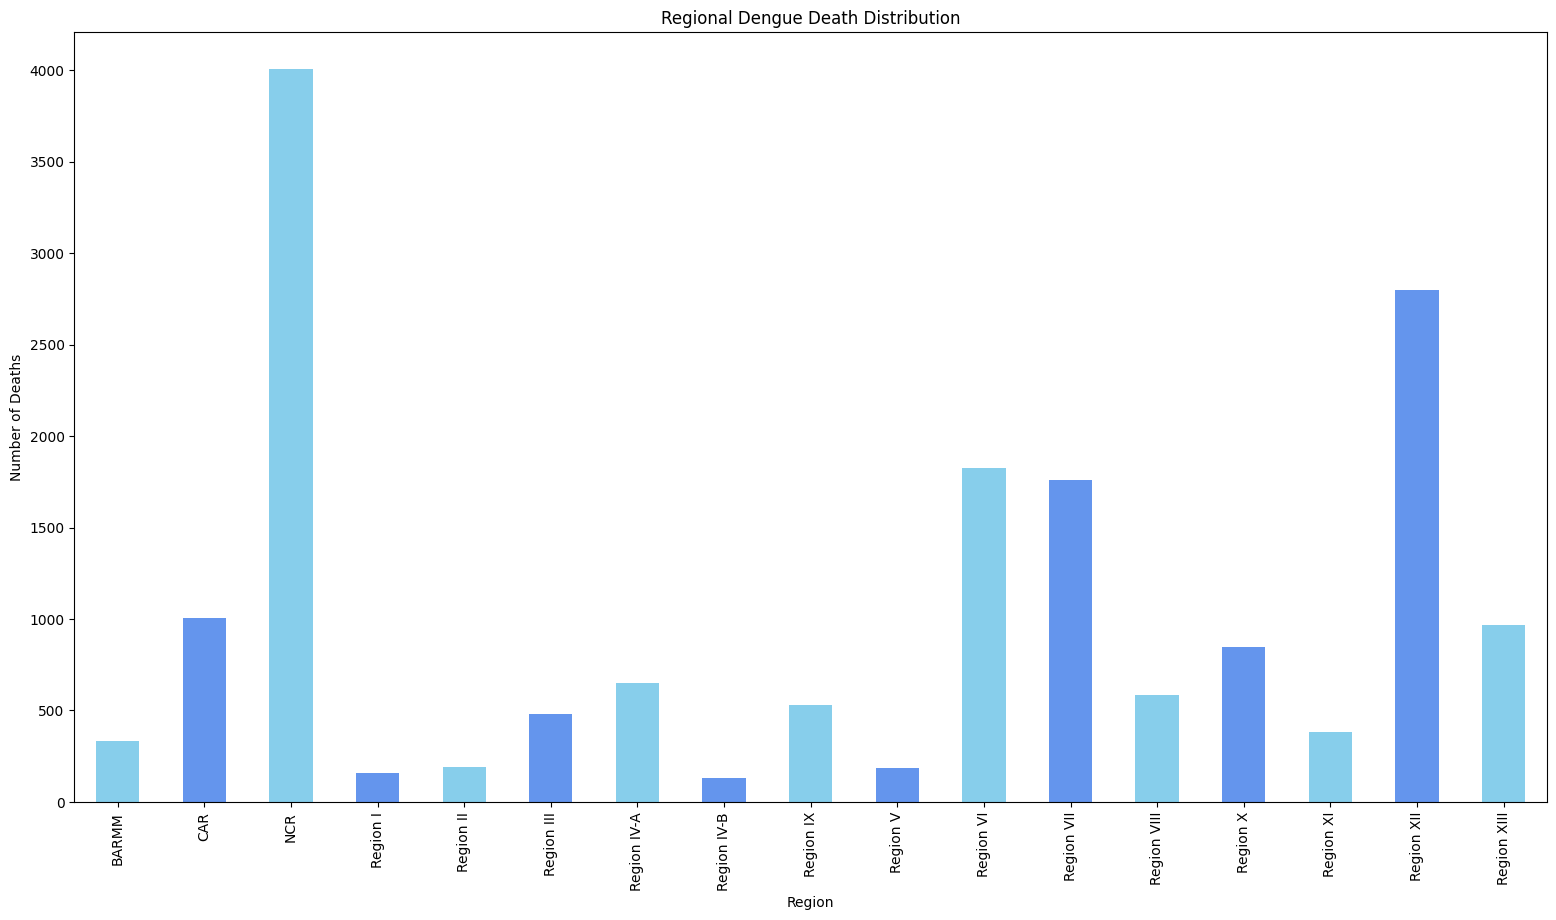

In [11]:
PH_DCases = PH_Dengue.groupby([ 'Region'])['Dengue_Deaths'].sum()
PH_DCases.plot(kind='bar', color = ['skyblue', 'cornflowerblue'])

plt.title('Regional Dengue Death Distribution')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.gcf().set_size_inches(19,10)
plt.show()

<h4>Insight 4</h4>
<p>This visualization shows how many people died from dengue in each region. NCR had the highest number of deaths, followed by Region XII and Region VI. This means those areas were hit hardest and may need more health support.</p>
<hr>

<h2>Question 5. From 2016 to 2020, how did dengue cases change across regions in the Philippines?</h2>

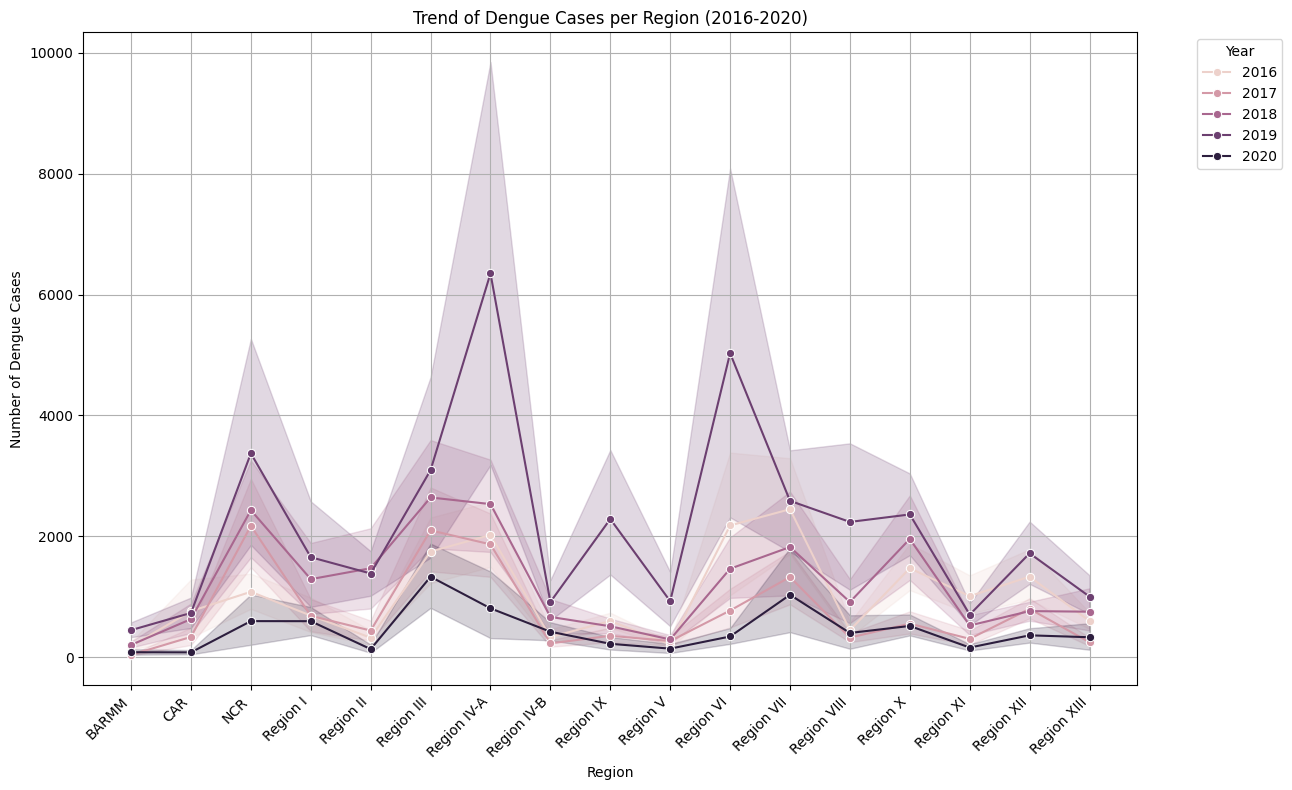

In [12]:
sns.lineplot(data = PH_Dengue, x = 'Region', y = 'Dengue_Cases', hue = 'Year', marker = 'o')

plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases per Region (2016-2020)')
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', title = 'Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Insight 5</h4>
<p>This visualization shows how dengue cases rose and fell in different regions over five years. Some regions BARMM and Region V had steady numbers, while others regions like Region IV-A and Region Region VI had big changes. This helps us see which areas were hit hardest and when.</p>
<hr>

<h2>Question 6. Which region had the highest number of dengue cases and deaths?</h2>

In [13]:
Regional_DCases = PH_Dengue.groupby(['Region'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
Regional_DCases['Mortality_Rate'] = np.round((Regional_DCases['Dengue_Deaths'] / Regional_DCases['Dengue_Cases']) * 100,2)
Regional_DCases

,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,BARMM,11537,332,2.88
1,CAR,30582,1008,3.30
2,NCR,115966,4008,3.46
3,Region I,59066,157,0.27
4,Region II,45141,193,0.43
5,Region III,131064,482,0.37
6,Region IV-A,163029,652,0.40
7,Region IV-B,30849,130,0.42
8,Region IX,47781,532,1.11
9,Region V,22167,185,0.83


<h4>Insight 6</h4>
<p>Result above shows the total number of Cases and Death cause of Dengue in all Region. Region IV-A had the most dengue cases, with over 163,029 reported, but its mortality rate is not the highest. And Region NCR had the highest number of deaths, reaching 4,008. Looking at both case numbers and mortality rate helps us understand where dengue is most dangerous and where health support is most needed.</p>
<hr>

<h2 style="text-align: center">REGION III DATA ANALYSIS</h2>
<hr>

In [14]:
Region_III = PH_Dengue[PH_Dengue['Region'] == 'Region III']

<h2>Question 7. From year 2016-2020, which month had the highest record of Dengue Cases in Region III?</h2>

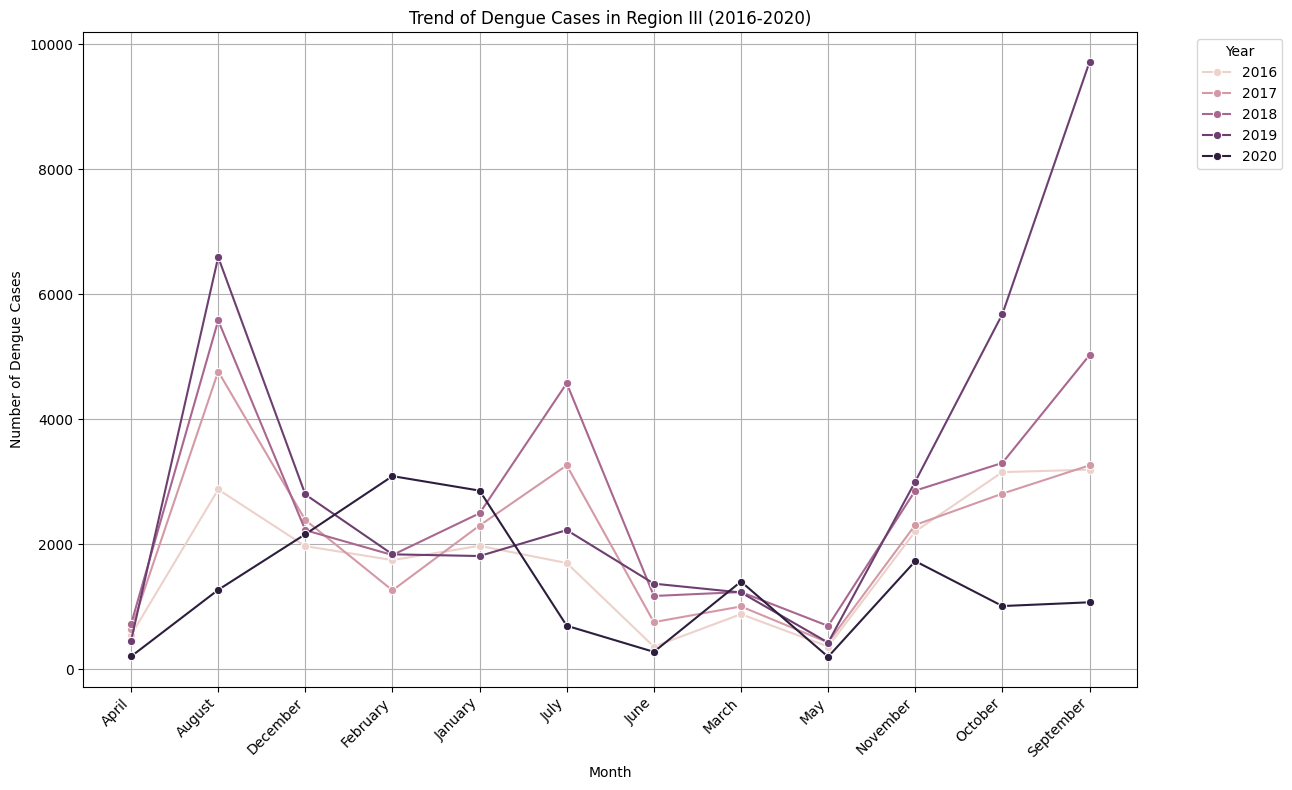

In [15]:
sns.lineplot(data = Region_III, x = 'Month', y = 'Dengue_Cases', hue = 'Year', marker = 'o')

plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases in Region III (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left',title = 'Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Insight 7</h4>
<p>This visualization shows how dengue cases changed each month over five years. The month of September 2019 had the highest number of cases, with a sharp peak compared to other months. This means dengue was most dangerous during that time. Knowing this can help people and health workers prepare better in future years.</p>
<hr>

<h2>Question 8. Which month had the highest number of deaths in Region III?</h2>

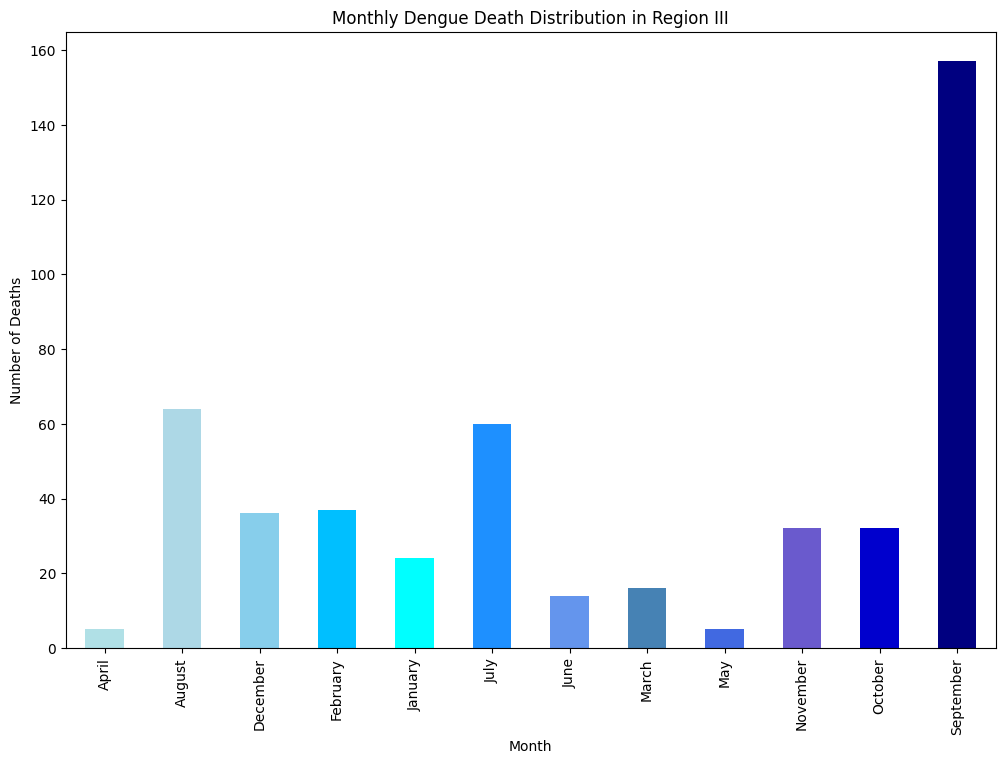

In [16]:
Pri_Arr = Region_III.groupby('Month')['Dengue_Deaths'].sum()
Pri_Arr.plot( kind='bar', color = ['powderblue', 'lightblue', 'skyblue', 'deepskyblue', 'cyan', 
 'dodgerblue', 'cornflowerblue', 'steelblue', 'royalblue', 
 'slateblue', 'mediumblue', 'navy']
)


plt.title('Monthly Dengue Death Distribution in Region III')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.gcf().set_size_inches(12,8)
plt.show()

<h4>Insight 8</h4>
<p>Shown above is the visualization of Monthly Death Distribution cause of Dengue. The number of dengue deaths in Region III changes each month. September had the most deaths, almost reaching 160. April and May had the fewest, with nearly zero deaths. This shows that dengue is more dangerous in some months, so extra care is needed during those times.</p>
<hr>

<h2 style="text-align: center">REGION V DATA ANALYSIS</h2>
<hr>

In [17]:
Region_V = PH_Dengue[PH_Dengue['Region'] == 'Region V']

<h2>Question 9. From year 2016-2020, which month has the highest record of Dengue Cases?</h2>

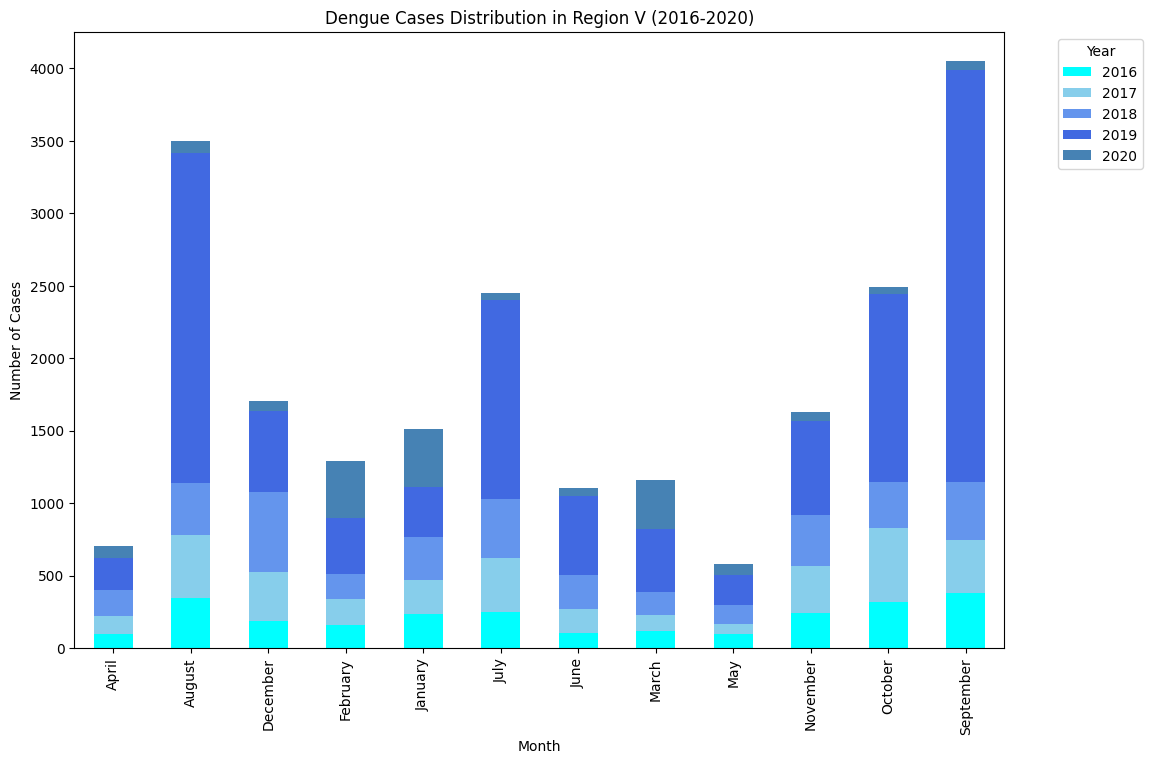

In [18]:
MY_Cases = Region_V.groupby(['Month', 'Year'])['Dengue_Cases'].sum().unstack()
MY_Cases.plot(kind='bar', stacked=True, color = ['cyan', 'skyblue', 'cornflowerblue', 'royalblue', 'steelblue'])

plt.title('Dengue Cases Distribution in Region V (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left',title = 'Year')
plt.gcf().set_size_inches(12,8)
plt.show()

<h4>Insight 9</h4>
<p>This visualization shows how dengue cases changed each month over five years in Region V. The month of September 2019 had the highest number of cases, with a sharp peak. And the month of May had the lowest number of cases compared to other months. This means dengue was most dangerous during that time. Knowing this can help people and health workers prepare better in future years.</p>
<hr>

<h3>CORRELATIONAL ANALYSIS ( NUMERIC VALUES CORRELATION )</h3> 
<hr>

<h2>Question 10. What kind of relationship can we see between dengue cases and deaths over the years?</h2>

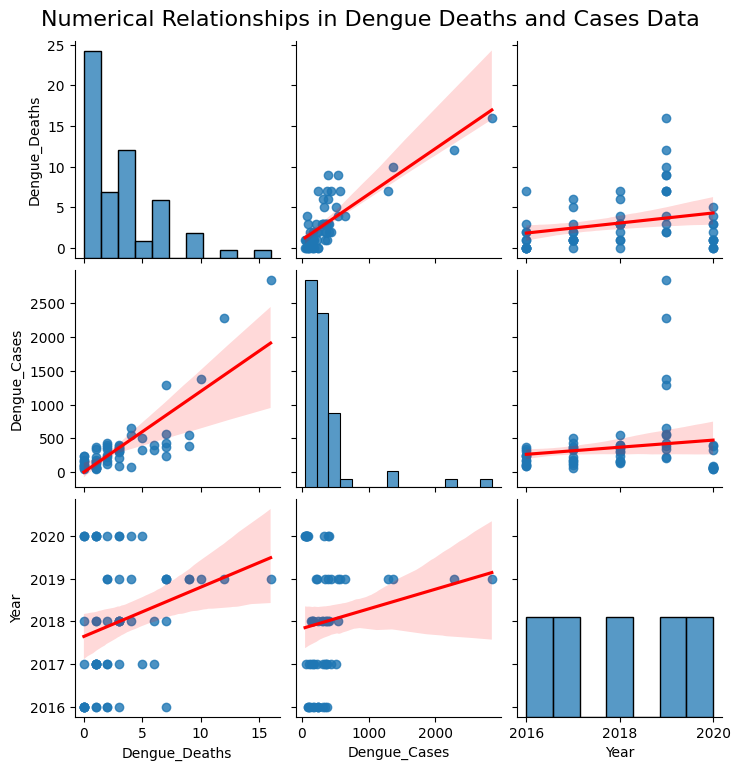

In [19]:
sns.pairplot(
    Region_V[['Dengue_Deaths', 'Dengue_Cases', 'Year']],
    kind='reg',  
    plot_kws={'line_kws': {'color': 'red'}}
)
plt.suptitle('Numerical Relationships in Dengue Deaths and Cases Data', y=1.02, fontsize=16)
plt.show()

<h4>Insight 10</h4>
<p>In this visualization you can see that as dengue cases increase, deaths also tend to rise, which means they are positively related. The red lines help us see this trend clearly. This pattern can guide health officials to focus more on areas with rising cases before deaths increase too.</p>
<hr>